In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score,r2_score
# loading Dataset.........
lasso_reg=pd.read_csv(r'C:\Users\MUNMUN\Desktop\concreate_strength_prediction_project\Mechine_learning\Concrete_Data.csv')
lasso_reg.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
lasso_reg.columns=['cement','BlastFurnase','FlyAsh','Water','SuperPlasticizer','CoarseAggreate','FineAggrate','Age','strength']
lasso_reg.head()

,cement,BlastFurnase,FlyAsh,Water,SuperPlasticizer,CoarseAggreate,FineAggrate,Age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [11]:
lasso_reg.describe()

,cement,BlastFurnase,FlyAsh,Water,SuperPlasticizer,CoarseAggreate,FineAggrate,Age,strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [12]:
X=lasso_reg.drop('strength',axis=1)
Y=lasso_reg['strength']

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=23)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(824, 8)
(206, 8)
(824,)
(206,)


In [14]:
#........powerTransformer used to normally distrbution in dataset......

from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()

In [15]:
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)

In [16]:
from sklearn.preprocessing import StandardScaler
sct=StandardScaler()

In [17]:
X_train_transformed=sct.fit_transform(X_train_transformed)
X_test_transformed=sct.transform(X_test_transformed)

In [18]:
from sklearn.linear_model import Lasso
lasso=Lasso().fit(X_train_transformed,Y_train)
print(lasso.intercept_)
print(lasso.coef_)

35.5102791262136
[ 7.59623027  4.09081044  0.         -3.37280522  2.66920389 -0.
 -0.07593458  8.82370249]


In [19]:
Ytrain_pred=lasso.predict(X_train_transformed)
Ytest_pred=lasso.predict(X_test_transformed)

In [20]:
#Explain variance error
print('The EVS is on train data :',explained_variance_score(Y_test,Ytest_pred))
print('The EVS is on train data :',explained_variance_score(Y_train,Ytrain_pred))

The EVS is on train data : 0.8026124157886998
The EVS is on train data : 0.7762678420477872


In [21]:
#mean_absolute_error
print('The mean_absolute_error is on train data :',mean_absolute_error(Y_test,Ytest_pred))
print('The mean_absolute_error is on test data :',mean_absolute_error(Y_train,Ytrain_pred))

The mean_absolute_error is on train data : 5.7642205395421895
The mean_absolute_error is on test data : 6.1021612135929235


In [22]:
#mean_squared_error
print('The mean_squared_error is on train data :',mean_squared_error(Y_test,Ytest_pred))
print('The mean_squared_error is on test data :',mean_squared_error(Y_train,Ytrain_pred))

The mean_squared_error is on train data : 58.528720434964804
The mean_squared_error is on test data : 61.302601676832815


In [23]:
#R2_score
print('The R2_score is on train data :',r2_score(Y_test,Ytest_pred))
print('The R2_score is on test data :',r2_score(Y_train,Ytrain_pred))

The R2_score is on train data : 0.8023754037903763
The R2_score is on test data : 0.7762678420477872


In [24]:
#rSquared on training dataset
print('Lasso r-squared regression on training data is',lasso.score(X_train_transformed,Y_train)*100)
print('Lasso r-squared on testing data is',lasso.score(X_test_transformed,Y_test)*100)

Lasso r-squared regression on training data is 77.62678420477872
Lasso r-squared on testing data is 80.23754037903763


In [25]:

! pip install yellowbrick 

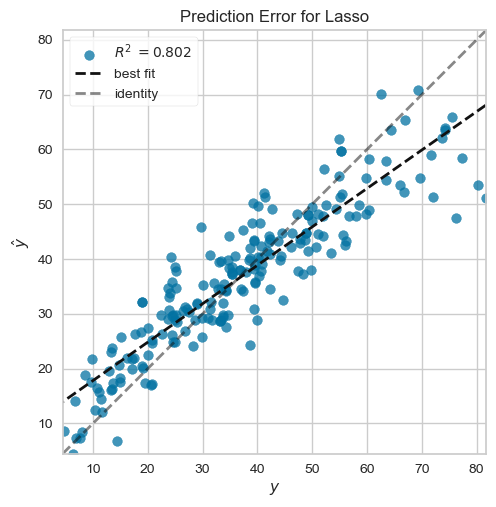

<Axes: title={'center': 'Prediction Error for Lasso'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [26]:
from sklearn.preprocessing import StandardScaler
from yellowbrick.regressor import PredictionError,ResidualsPlot
visualizer=PredictionError(lasso)
visualizer.fit(X_train_transformed,Y_train)
visualizer.score(X_test_transformed,Y_test)
visualizer.poof()

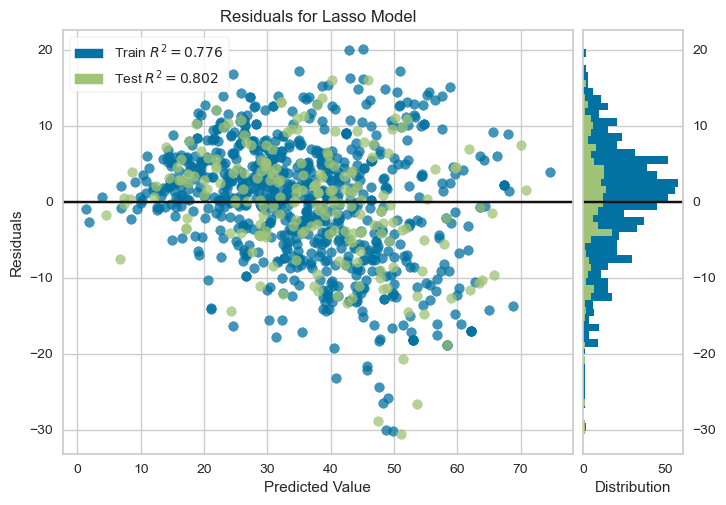

<Axes: title={'center': 'Residuals for Lasso Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [28]:
#
visualizer=ResidualsPlot(lasso)
visualizer.fit(X_train_transformed,Y_train)
visualizer.score(X_test_transformed,Y_test)
visualizer.poof()

In [29]:
alphas=10**np.linspace(0,100,10)*0.5
l_min=0.01
l_max=0.2
l_num=10
lambdas=np.linspace(l_min,l_max,l_num)

pred_num=X.shape[1]

coef_a=np.zeros((l_num,pred_num))

rsq_train=np.zeros(l_num)
rsq_test=np.zeros(l_num)

#Enumerating through lamdas with index and i
for index, i in enumerate(lambdas):
  lasso1=Lasso(alpha = i).fit(X_train_transformed,Y_train)
  coef_a[index,:]=lasso1.coef_
  rsq_train[index]=lasso1.score(X_train_transformed,Y_train)
  rsq_test[index]=lasso1.score(X_test_transformed,Y_test)


C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_14564\2120170472.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rsq_train, 'bo-', label='r$R^2$ traing data', color='blue',alpha= 0.6, linewidth= 4)
C:\Users\MUNMUN\AppData\Local\Temp\ipykernel_14564\2120170472.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(rsq_test, 'bo-', label='r$R^2$ testing data', color='red',alpha= 0.6, linewidth= 4)


Text(0.5, 0, 'Lasso regression with different lambdas values')

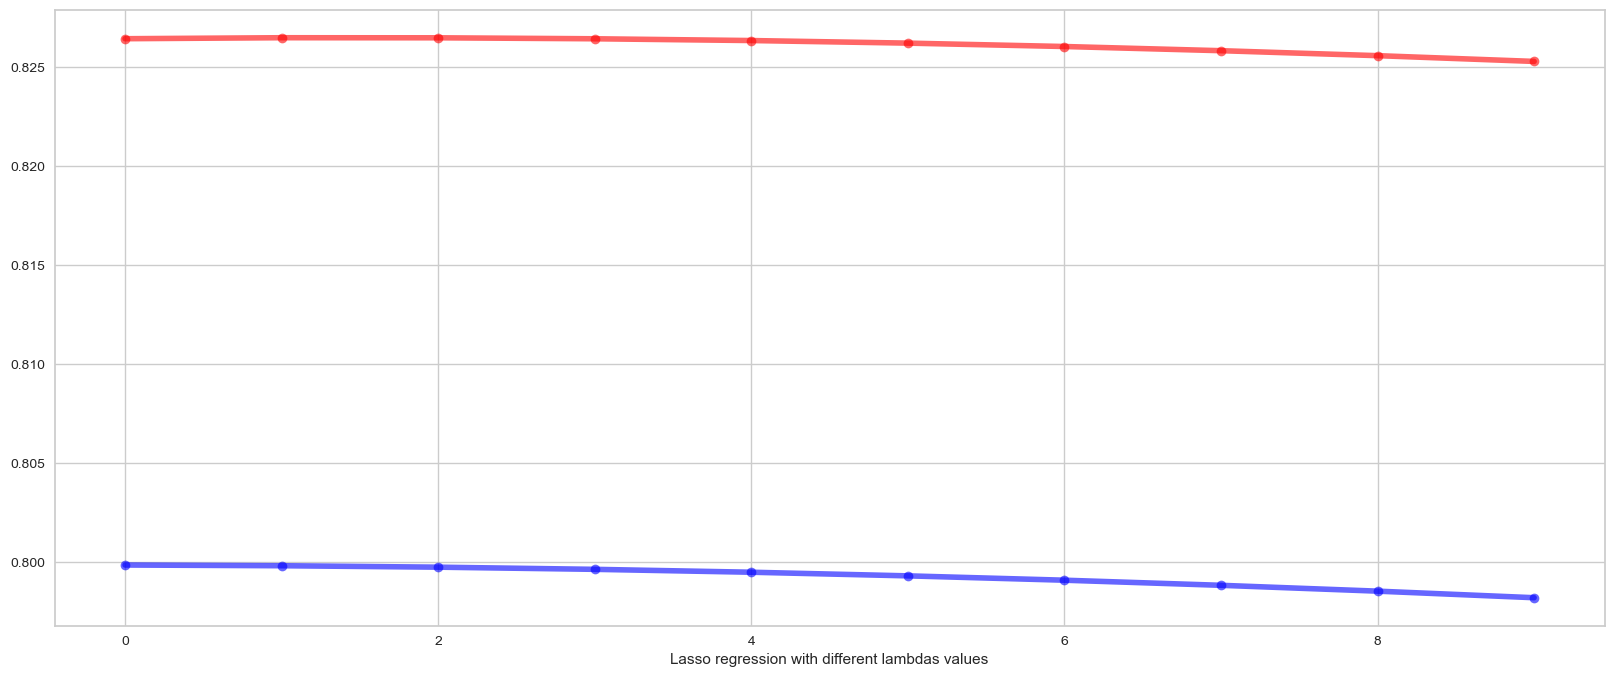

In [30]:
#plotting training and testing r-squred values as a function of lanbdas
plt.figure(figsize=(20, 8))
plt.plot(rsq_train, 'bo-', label='r$R^2$ traing data', color='blue',alpha= 0.6, linewidth= 4)
plt.plot(rsq_test, 'bo-', label='r$R^2$ testing data', color='red',alpha= 0.6, linewidth= 4)
plt.xlabel('Lasso regression with different lambdas values')

In [31]:
pred_Ytest=lasso1.predict(X_test_transformed)
pred_Ytrain=lasso1.predict(X_train_transformed)

In [32]:
#Explain variance error
print('Explained_variance_score on testing data:',explained_variance_score(pred_Ytrain,Y_train))
print('Explained_variance_score on training data:',explained_variance_score(pred_Ytest,Y_test))

Explained_variance_score on testing data: 0.7315310813647199
Explained_variance_score on training data: 0.7755963562693732


In [33]:
#root_mean_squared_error
print('RMSE on testing data',np.sqrt(mean_squared_error(Y_test,pred_Ytest)))
print('RMSE on training data',np.sqrt(mean_squared_error(Y_train,pred_Ytrain)))

RMSE on testing data 7.193157598263306
RMSE on training data 7.435833569839731


In [34]:
#mean_squared_error
print('MSE on training data:',mean_squared_error(Y_test,pred_Ytest))
print('MSE on testing data:',mean_squared_error(Y_train,pred_Ytrain))

MSE on training data: 51.741516233453126
MSE on testing data: 55.291620878355474


In [35]:
# R2_score
print('R2_score:',r2_score(Y_test,pred_Ytest))
print('R2_score:',r2_score(Y_train,pred_Ytrain))

R2_score: 0.8252926738032487
R2_score: 0.7982057316098363


In [36]:
#model tuning using LassoCV
from sklearn.linear_model import LassoCV

In [37]:
lasso_cv=LassoCV(alphas=np.random.randint(0,100,10),cv=10,max_iter=1000).fit(X_train_transformed,Y_train)

In [38]:
#printing the score
lasso_cv

LassoCV(alphas=array([12, 73,  1, 29, 94, 77, 30, 43, 94,  4]), cv=10)

In [39]:
lasso_cv.alphas

array([12, 73,  1, 29, 94, 77, 30, 43, 94,  4])

In [40]:
#the optimum alpha values of the model
lasso_cv.alpha_

1

In [41]:
#creating a new optimum model
lasso_tuned=Lasso().set_params(alpha=lasso_cv.alpha_).fit(X_train_transformed,Y_train)

In [42]:
#prediction the tuned on test data
y_pred1=lasso_tuned.predict(X_test_transformed)

In [43]:
print(np.sqrt(mean_squared_error(Y_test,y_pred1)))

7.650406553573791
